In [2]:
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('cannabis_full.csv')

# **Part One: Binary Classification**

In [4]:
df_partial = df[(df["Type"] == "sativa") | (df["Type"] == "indica")]
df_partial = df_partial.dropna()
df_partial.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,303-Og,indica,4.2,"Relaxed,Happy,Euphoric,Uplifted,Giggly","Citrus,Pungent,Earthy",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3D-Cbd,sativa,4.6,"Uplifted,Focused,Happy,Talkative,Relaxed","Earthy,Woody,Flowery",0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3X-Crazy,indica,4.4,"Relaxed,Tingly,Happy,Euphoric,Uplifted","Earthy,Grape,Sweet",0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,5Th-Element,indica,4.4,"Relaxed,Focused,Euphoric,Uplifted,Aroused","Earthy,Woody,Pine",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# assign X and y
X = df_partial.drop(['Strain', 'Type', 'Rating', 'Effects', 'Flavor'], axis = 1)
y = df_partial['Type']

**CHOSEN METRIC:** The metric chosen for all 4 types of model is accuracy score. This is easily measurable through confusion matrices and cross validation.

### **Q1: LDA**

In [6]:
# pipeline: lda
lda_model = Pipeline(
  [("standardize", StandardScaler()),
  ("lda", LinearDiscriminantAnalysis())]
)

# fit: lda
lda_fitted = lda_model.fit(X, y)

# accuracy score: lda
cross_val_score(lda_model, X, y, cv = 5, scoring = 'accuracy').mean()

np.float64(0.8567416962836208)

In [7]:
# confusion matrix: lda
y_pred_lda = lda_model.predict(X)
confusion_matrix(y, y_pred_lda)

array([[612,  47],
       [ 76, 333]])

In [8]:
# get coefficients and intercept: lda
lda_coefs = lda_fitted.named_steps['lda'].coef_[0][0:5]
lda_intercept = lda_fitted.named_steps['lda'].intercept_
lda_coefs, lda_intercept

(array([ 0.05599098,  1.57442228, -0.31268143, -0.16619829, -0.78015877]),
 array([-1.26825994]))

### **Q2: QDA**

In [9]:
# pipeline: qda
qda_model = Pipeline(
  [("standardize", StandardScaler()),
  ("qda", QuadraticDiscriminantAnalysis(reg_param = 0.1))]
)

# fit: qda
qda_fitted = qda_model.fit(X, y)

# accuracy score: qda
cross_val_score(qda_model, X, y, cv = 5, scoring = 'accuracy').mean()

np.float64(0.7781185555701813)

In [10]:
# confusion matrix: qda
y_pred_qda = qda_model.predict(X)
confusion_matrix(y, y_pred_qda)

array([[544, 115],
       [ 40, 369]])

### **Q3: SVC**

In [11]:
# pipeline: svc
svc_pipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("svc", SVC(kernel = 'linear', probability = True))]
)

# tuning: svc
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100]}
svc_pipeline_grid = GridSearchCV(svc_pipeline, param_grid, cv = 5)

In [12]:
# fit best: svc
svc_fitted = svc_pipeline_grid.fit(X, y)
svc_best = svc_pipeline_grid.best_estimator_
svc_pipeline = svc_best.named_steps["svc"]
svc_pipeline

SVC(C=0.1, kernel='linear', probability=True)

In [13]:
# best model: svc
svc_model = Pipeline(
  [("standardize", StandardScaler()),
  ("svc", SVC(C = 0.1, kernel = 'linear', probability = True))]
)

# fit: svc
svc_fitted = svc_model.fit(X, y)

# accuracy score: svc
cross_val_score(svc_model, X, y, cv = 5, scoring = 'accuracy').mean()

np.float64(0.8586240182528192)

In [14]:
# get coefficients and intercept: svc
svc_coefs = svc_fitted.named_steps['svc'].coef_[0][0:5]
svc_intercept = svc_fitted.named_steps['svc'].intercept_
svc_coefs, svc_intercept

(array([ 0.03572648,  0.60741813, -0.20623992, -0.08392741, -0.40240462]),
 array([-0.5903448]))

In [15]:
# confusion matrix: svc
y_pred_svc = svc_model.predict(X)
confusion_matrix(y, y_pred_svc)

array([[609,  50],
       [ 62, 347]])

### **Q4: SVM**

In [16]:
# pipeline: svm
svm_pipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("svm", SVC(kernel = 'poly', probability = True))]
)

# tuning: svm
param_grid = {'svm__C': [0.01, 0.1, 1, 10, 100]}
svm_pipeline_grid = GridSearchCV(svm_pipeline, param_grid, cv = 5)

In [17]:
# fit best: svm
svm_fitted = svm_pipeline_grid.fit(X, y)
svm_best = svm_pipeline_grid.best_estimator_
svm_pipeline = svm_best.named_steps["svm"]
svm_pipeline

SVC(C=10, kernel='poly', probability=True)

In [18]:
# best model: svm
svm_model = Pipeline(
  [("standardize", StandardScaler()),
  ("svm", SVC(C = 10, kernel = 'poly', probability = True))]
)

# fit: svm
svm_fitted = svm_model.fit(X, y)

# accuracy score: svm
cross_val_score(svm_model, X, y, cv = 5, scoring = 'accuracy').mean()

np.float64(0.8408757843008207)

In [19]:
# get intercept: svm
svm_intercept = svm_fitted.named_steps['svm'].intercept_
svm_intercept

array([-0.46962828])

In [20]:
# confusion matrix: svm
y_pred_svm = svm_model.predict(X)
confusion_matrix(y, y_pred_svm)

array([[656,   3],
       [ 27, 382]])

**FINAL MODEL:** The SVC model with C = 0.1 and linear kernel has the highest accuracy score.

# **Part Two: Natural Multiclass**

In [21]:
df = df.dropna()
df.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# assign X and y
X = df.drop(['Strain', 'Type', 'Rating', 'Effects', 'Flavor'], axis = 1)
y = df['Type']

### **Q1**

In [23]:
# pipeline: dt
dt_pipeline = Pipeline(
    [("scale", StandardScaler()),
    ("model", DecisionTreeClassifier(max_depth = 2))]
)

# tuning: dt
param_grid = {'model__max_depth': [1, 2, 3, 4, 5, 6, 7, 8]}
dt_pipeline_grid = GridSearchCV(dt_pipeline, param_grid, cv = 5)

In [24]:
# fit best: dt
dt_fitted = dt_pipeline_grid.fit(X, y)
dt_best = dt_pipeline_grid.best_estimator_
dt_pipeline = dt_best.named_steps["model"]
dt_pipeline

DecisionTreeClassifier(max_depth=3)

In [25]:
# best model: dt
dt_model = Pipeline(
    [("scale", StandardScaler()),
    ("model", DecisionTreeClassifier(max_depth = 3))]
)

# fit: dt
dt_fitted = dt_model.fit(X, y)

# accuracy score: dt
cross_val_score(dt_model, X, y, cv = 5, scoring = 'accuracy').mean()

np.float64(0.6198084064030954)

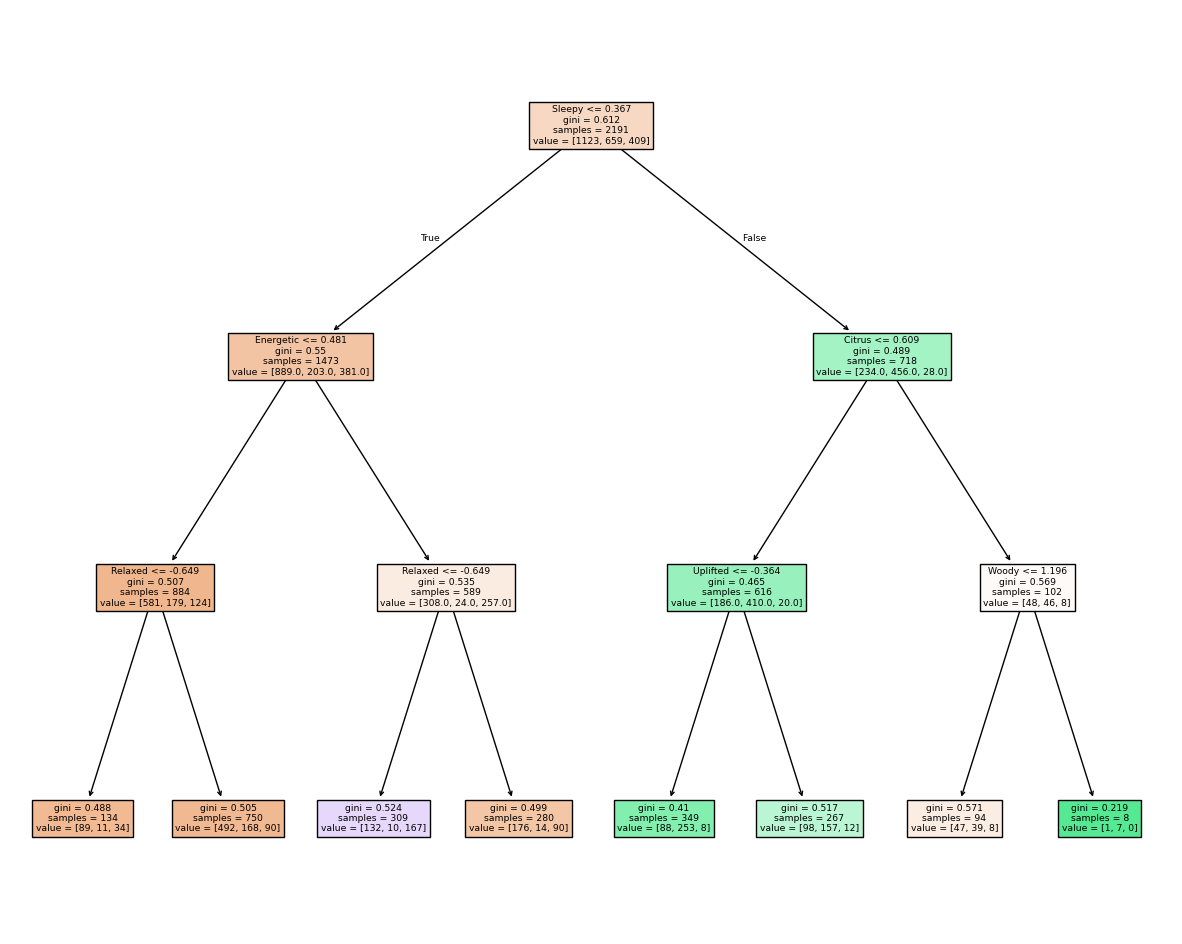

In [26]:
# plot: dt
plt.figure(figsize=(15,12))
plot_tree(dt_model.named_steps['model'], feature_names = X.columns, filled = True)
plt.savefig("tree_plot.png", dpi = 600, bbox_inches = 'tight')

In [28]:
# get feature importance: dt
dt_feature_importances = dt_model.named_steps['model'].feature_importances_
dt_values = pd.DataFrame({'feature': X.columns, 'feature importance': dt_feature_importances})
dt_values.sort_values(by = 'feature importance', ascending = False)

,feature,feature importance
12,Sleepy,0.696844
1,Energetic,0.180571
4,Relaxed,0.067336
17,Citrus,0.025973
7,Uplifted,0.019006
...,...,...
59,Pineapple,0.000000
60,Tar,0.000000
61,Rose,0.000000
62,Plum,0.000000


INTERPRETATION: The most important feature in predicting cannabis `Type` is `Sleepy`, followed by `Energetic` and `Relaxed`. On the other hand, the least important features include `Pear`, `Plum`, and `Rose`. How the cannabis makes the customer feel as more impact than its flavor.

### **Q2**

In [29]:
# pipeline: lda
lda_model = Pipeline(
  [("standardize", StandardScaler()),
  ("lda", LinearDiscriminantAnalysis())]
)

# fit: lda
lda_fitted = lda_model.fit(X, y)

# accuracy score: lda
cross_val_score(lda_model, X, y, cv = 5, scoring = 'accuracy').mean()

np.float64(0.6280244640683996)

In [30]:
# confusion matrix: lda
y_pred_lda = lda_model.predict(X)
confusion_matrix(y, y_pred_lda)

array([[780, 203, 140],
       [188, 461,  10],
       [206,  20, 183]])

In [31]:
# get coefficients and intercepts: lda
lda_coefs = lda_fitted.named_steps['lda'].coef_[0][0:5]
lda_intercepts = lda_fitted.named_steps['lda'].intercept_
lda_coefs, lda_intercepts

(array([ 0.01378474, -0.0618209 , -0.04457294, -0.03586044,  0.04169685]),
 array([-0.74407461, -1.86457837, -2.49122925]))

In [32]:
# pipeline: qda
qda_model = Pipeline(
  [("standardize", StandardScaler()),
  ("qda", QuadraticDiscriminantAnalysis(reg_param = 0.1))]
)

# fit: qda
qda_fitted = qda_model.fit(X, y)

# accuracy score: qda
cross_val_score(qda_model, X, y, cv = 5, scoring = 'accuracy').mean()

np.float64(0.43953776224503593)

In [33]:
# confusion matrix: qda
y_pred_qda = qda_model.predict(X)
confusion_matrix(y, y_pred_qda)

array([[298, 317, 508],
       [ 50, 514,  95],
       [ 31,  31, 347]])

In [34]:
# pipeline: knn
knn_model = Pipeline(
  [("standardize", StandardScaler()),
  ("knn", KNeighborsClassifier())]
)

# fit: knn
knn_fitted = knn_model.fit(X, y)

# accuracy score: knn
cross_val_score(knn_model, X, y, cv = 5, scoring = 'accuracy').mean()

np.float64(0.5408764210898576)

In [35]:
# confusion matrix: knn
y_pred_knn = knn_model.predict(X)
confusion_matrix(y, y_pred_knn)

array([[930, 136,  57],
       [260, 394,   5],
       [221,  21, 167]])

### **Q3:**

The metrics were generally worse for Part Two with lower accuracy scores. This may have to do with the nature of classifying three categories instead of two (binary).

### **Part Three: Multiclass from Binary**

In [36]:
# create dummy columns from Type
df['hybrid'] = np.where(df['Type'] == 'hybrid', 1, 0)
df['sativa'] = np.where(df['Type'] == 'sativa', 1, 0)
df['indica'] = np.where(df['Type'] == 'indica', 1, 0)
df.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear,hybrid,sativa,indica
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0


### **Q1**

In [37]:
# pipeline: svc
svc_model = Pipeline(
  [("standardize", StandardScaler()),
  ("svc", SVC(C = 0.1, kernel = 'linear', probability = True))]
)

In [38]:
# assign y
y_indica = df['indica']

# fit: svc
svc_indica = svc_model.fit(X, y_indica)

# f1 score: ovr, svc, indica
cross_val_score(svc_model, X, y_indica, cv = 5, scoring = 'f1').mean()

np.float64(0.6618936442536972)

In [39]:
# assign y
y_sativa = df['sativa']

# fit: svc
svc_sativa = svc_model.fit(X, y_sativa)

# f1 score: ovr, svc, sativa
cross_val_score(svc_model, X, y_sativa, cv = 5, scoring = 'f1').mean()

np.float64(0.21559266130694704)

In [40]:
# assign y
y_hybrid = df['hybrid']

# fit: svc
svc_hybrid = svc_model.fit(X, y_hybrid)

# f1 score: ovr, svc, hybrid
cross_val_score(svc_model, X, y_hybrid, cv = 5, scoring = 'f1').mean()

np.float64(0.6716032762955153)

In [41]:
# pipeline: logistic
logistic_model = Pipeline(
    [("scale", StandardScaler()),
    ("model", LogisticRegression())]
)

In [42]:
# fit: logistic
logistic_indica = logistic_model.fit(X, y_indica)

# f1 score: ovr, logistic, indica
cross_val_score(logistic_model, X, y_indica, cv = 5, scoring = 'f1').mean()

np.float64(0.6365339783598796)

In [43]:
# fit: logistic
logistic_sativa = logistic_model.fit(X, y_sativa)

# f1 score: ovr, logistic, sativa
cross_val_score(logistic_model, X, y_sativa, cv = 5, scoring = 'f1').mean()

np.float64(0.40352165754102537)

In [44]:
# fit: logistic
logistic_hybrid = logistic_model.fit(X, y_hybrid)

# f1 score: ovr, logistic, hybrid
cross_val_score(logistic_model, X, y_hybrid, cv = 5, scoring = 'f1').mean()

np.float64(0.6368196165299104)

### **Q2**

Based on F1 score, SVC hybrid did the best and SVC sativa did the worst. This does not make intuitive sense because one would expect hybrid to have the most incorrect predictions since it has elements of both sativa and indica.

### **Q3**

In [64]:
# pipeline: svc
svc_model = Pipeline(
  [("standardize", StandardScaler()),
  ("svc", SVC(C = 0.1, kernel = 'linear', probability = True))]
)

In [65]:
# remove rows except for indica and sativa
df_is = df[(df["Type"] == "indica") | (df["Type"] == "sativa")]

# assign X and y
X_is = df_is.drop(['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'indica', 'sativa', 'hybrid'], axis = 1)
y_is = df_is["Type"]

# fit: svc
svc_model.fit(X_is, y_is)

# roc-auc score: svc, ovo, indica + sativa
cross_val_score(svc_model, X_is, y_is, cv = 5, scoring = 'roc_auc').mean()

np.float64(0.9298507261391785)

In [66]:
# remove rows except for indica and hybrid
df_ih = df[(df["Type"] == "indica") | (df["Type"] == "hybrid")]

# assign X and y
X_ih = df_ih.drop(['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'indica', 'sativa', 'hybrid'], axis = 1)
y_ih = df_ih["Type"]

# fit: svc
svc_model.fit(X_ih, y_ih)

# roc-auc score: svc, ovo, indica + hybrid
cross_val_score(svc_model, X_ih, y_ih, cv = 5, scoring = 'roc_auc').mean()

np.float64(0.7785075051909499)

In [67]:
# remove rows except for hybrid and sativa
df_hs = df[(df["Type"] == "hybrid") | (df["Type"] == "sativa")]

# assign X and y
X_hs = df_hs.drop(['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'indica', 'sativa', 'hybrid'], axis = 1)
y_hs = df_hs["Type"]

# fit: svc
svc_model.fit(X_hs, y_hs)

# roc-auc score: svc, ovo, hybrid + sativa
cross_val_score(svc_model, X_hs, y_hs, cv = 5, scoring = 'roc_auc').mean()

np.float64(0.7317631695607079)

In [68]:
# pipeline: logistic
logistic_model = Pipeline(
    [("scale", StandardScaler()),
    ("model", LogisticRegression())]
)

In [69]:
# fit: logistic
logistic_model.fit(X_is, y_is)

# roc-auc score: svc, ovo, indica + sativa
cross_val_score(logistic_model, X_is, y_is, cv = 5, scoring = 'roc_auc').mean()

np.float64(0.927123764416892)

In [70]:
# fit: logistic
logistic_model.fit(X_ih, y_ih)

# roc-auc score: svc, ovo, indica + hybrid
cross_val_score(logistic_model, X_ih, y_ih, cv = 5, scoring = 'roc_auc').mean()

np.float64(0.7914652815642796)

In [71]:
# fit: logistic
logistic_model.fit(X_hs, y_hs)

# roc-auc score: svc, ovo, hybrid + sativa
cross_val_score(logistic_model, X_hs, y_hs, cv = 5, scoring = 'roc_auc').mean()

np.float64(0.7320631497254126)

### **Q4**

Based on ROC-AUC score, SVC indica + sativa did the best and SVC hybrid + sativa did the worst. This makes intuitive sense because hybrid has elements of both indica and sativa, and therefore, should be the hardest to discern. Indica + sativa is most easily distinguishable.

### **Q5**

`LogisticRegression` would likely use OvR because it predicts an outcome using all variables given. `SVC` would likely use OvO because it is single vector classification and focuses on binary classification (two variables or possible outcomes).